# Test: Animated population plots

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
from IPython.display import HTML
sns.set_context('paper')

Load data:

In [2]:
migration_data = pd.read_csv('../../data/outputs/all_lifelogs_compact.tsv', sep='\t', index_col = None)
migration_data.head()

,Unnamed: 0,release,era,hash,playerID,tBirth,parent,birth,tDeath,death,age,cause_of_death,birthX,birthY,deathX,deathY,first,last
0,0,342.0,boundless,2cdc4d0b016f9c0d96d27013f1d19c42596e0c5c,3080130,1592288229,3080111,[-454640 41],1592288538,[-454625 49],5.14,hunger,-454640,41,-454625,49,CLAUDINE,P
1,1,342.0,boundless,a8b5975a81344f690f45ffc2554a0bc35af557a9,3080128,1592288191,3080105,[-454394 -4],1592291791,[-454383 15],60.00,oldAge,-454394,-4,-454383,15,DACY,LIGHTNING
2,2,342.0,boundless,c5838da39fd525a2ac24aee049dae6a42e502236,3080125,1592288138,3080101,[-311131 -322],1592291738,[-311112 -325],59.98,hunger,-311131,-322,-311112,-325,SHOKO,GREATHOUSE
3,3,342.0,boundless,11f9fce50bbc1ebbba5126434aea123e79249942,3080122,1592288029,3080104,[-454638 41],1592288696,[-454647 58],11.12,hunger,-454638,41,-454647,58,RANGER,PICKLE
4,4,342.0,boundless,b265b1958566b474094cf0282a0fa59e6d622885,3080120,1592287917,3080101,[-311111 -311],1592291365,[-311115 -66],57.46,hunger,-311111,-311,-311115,-66,HAPPY,GREATHOUSE


# "Popcorn" plot

### Select a subset of the data

Choose a release to test out this visualization, and subset the data:

In [3]:
r = 299

migration_sub = migration_data[migration_data['release'] == r].reset_index(drop=True)
migration_sub = migration_sub.sort_values(by='tBirth')
migration_sub.head()

,Unnamed: 0,release,era,hash,playerID,tBirth,parent,birth,tDeath,death,age,cause_of_death,birthX,birthY,deathX,deathY,first,last
45427,384911,299.0,boundless,c0ad98c5a08626a24e4329ac1dc800cf9ec0ba32,2441665,1576886448,2441575,[-47447 -89],1576889924,[-47430 -71],57.94,hunger,-47447,-89,-47430,-71,PEACE,EIS
45426,384910,299.0,boundless,0f2581e25a68779fe77cec28d452e69a083a9643,2441666,1576886477,2441554,[-49351 -771],1576888607,[-47840 -493],35.50,hunger,-49351,-771,-47840,-493,MERLIN,WHISLER
45425,384909,299.0,boundless,dedb8a85f366f2c5e52ff68a515228ee3ee5eae8,2441667,1576886500,2441544,[-49313 -747],1576890100,[-49298 -756],60.00,oldAge,-49313,-747,-49298,-756,FURY,WHISLER
45424,384908,299.0,boundless,d3529d4752d1f8fd3ea1f6d79f8709011f70dee2,2441668,1576886501,2441557,[-49233 -832],1576886897,[-49311 -759],6.61,hunger,-49233,-832,-49311,-759,SAMUEL,WHISLER
45423,384907,299.0,boundless,7cbeb571e9e7f744cd6d41537137d2b7cf1063b4,2441669,1576886502,2441548,[-46391 -277],1576888072,[-46733 -81],26.17,hunger,-46391,-277,-46733,-81,ARRYN,SELIN


### Prepare data for plotting

Mark start and end times for each point:

In [4]:
# Calculate start and end times
migration_sub['t_start'] = migration_sub['tBirth'] - min(migration_sub['tBirth'])
migration_sub['t_end'] = migration_sub['t_start'] + migration_sub['age']*60

# Convert to integer
migration_sub['t_start'] = migration_sub['t_start'].astype(np.int)

In [5]:
migration_sub.head()

,Unnamed: 0,release,era,hash,playerID,tBirth,parent,birth,tDeath,death,age,cause_of_death,birthX,birthY,deathX,deathY,first,last,t_start,t_end
45427,384911,299.0,boundless,c0ad98c5a08626a24e4329ac1dc800cf9ec0ba32,2441665,1576886448,2441575,[-47447 -89],1576889924,[-47430 -71],57.94,hunger,-47447,-89,-47430,-71,PEACE,EIS,0,3476.4
45426,384910,299.0,boundless,0f2581e25a68779fe77cec28d452e69a083a9643,2441666,1576886477,2441554,[-49351 -771],1576888607,[-47840 -493],35.50,hunger,-49351,-771,-47840,-493,MERLIN,WHISLER,29,2159.0
45425,384909,299.0,boundless,dedb8a85f366f2c5e52ff68a515228ee3ee5eae8,2441667,1576886500,2441544,[-49313 -747],1576890100,[-49298 -756],60.00,oldAge,-49313,-747,-49298,-756,FURY,WHISLER,52,3652.0
45424,384908,299.0,boundless,d3529d4752d1f8fd3ea1f6d79f8709011f70dee2,2441668,1576886501,2441557,[-49233 -832],1576886897,[-49311 -759],6.61,hunger,-49233,-832,-49311,-759,SAMUEL,WHISLER,53,449.6
45423,384907,299.0,boundless,7cbeb571e9e7f744cd6d41537137d2b7cf1063b4,2441669,1576886502,2441548,[-46391 -277],1576888072,[-46733 -81],26.17,hunger,-46391,-277,-46733,-81,ARRYN,SELIN,54,1624.2


How long is the period studied?

In seconds:

In [6]:
t_in_secs = migration_sub[['t_start',  't_end']].max()
total_t = t_in_secs['t_end']
print(t_in_secs)

t_start    1209229.0
t_end      1209478.6
dtype: float64


In days:

In [7]:
t_in_days = t_in_secs/60/60/24
print(t_in_days)

t_start    13.995706
t_end      13.998595
dtype: float64


### Choose spatial and temporal window to plot

**Spatial:** Get range of x- and y-values. We want to keep the bounds of the plot consistent through the animation.

In [8]:
xs = migration_sub.birthX.values
x_bounds = (-65000, np.max(xs)+1000)

ys = migration_sub.birthY.values
y_bounds = (-5000, np.max(ys)+1000)

print(x_bounds)
print(y_bounds)

(-65000, -43100)
(-5000, 3241)


**Temporal:** Set intervals for animation. All told, we want the animation to last 30 seconds.

In [19]:
fps = 30
total_time_msec = 30*100
interval = 10
n_frames = int(total_time_msec/interval)
span_per_frame = total_t/n_frames/60

t_frames = np.linspace(0, total_t, n_frames)

print('Generating %i frames' % n_frames)
print('Each frame spans %0.2f minutes' % span_per_frame)
print(t_frames)

Generating 300 frames
Each frame spans 67.19 minutes
[       0.             4045.07892977     8090.15785953    12135.2367893
    16180.31571906    20225.39464883    24270.4735786     28315.55250836
    32360.63143813    36405.71036789    40450.78929766    44495.86822742
    48540.94715719    52586.02608696    56631.10501672    60676.18394649
    64721.26287625    68766.34180602    72811.42073579    76856.49966555
    80901.57859532    84946.65752508    88991.73645485    93036.81538462
    97081.89431438   101126.97324415   105172.05217391   109217.13110368
   113262.21003344   117307.28896321   121352.36789298   125397.44682274
   129442.52575251   133487.60468227   137532.68361204   141577.76254181
   145622.84147157   149667.92040134   153712.9993311    157758.07826087
   161803.15719064   165848.2361204    169893.31505017   173938.39397993
   177983.4729097    182028.55183946   186073.63076923   190118.709699
   194163.78862876   198208.86755853   202253.94648829   206299.02541806
 

### Generate plot

Each dot shows the location where a player was born; the dot appears when the player was born and disappears when the player days. Moving forward, we can build on this visualization by:

* Tracing where each player died
* Color-coding players by lineage/spatial cluster

...But that's too many moving parts for now!

In [14]:
colors = {}
for i in migration_sub['last'].unique():
    colors[i] = list(np.random.choice(range(256), size=3)/256)
    
colors

{'EIS': [0.01171875, 0.24609375, 0.56640625],
 'WHISLER': [0.37890625, 0.8671875, 0.8984375],
 'SELIN': [0.01953125, 0.62109375, 0.0625],
 'AMANDA': [0.69921875, 0.23046875, 0.20703125],
 'GYIMAH': [0.32421875, 0.390625, 0.36328125],
 'DOBBIE': [0.91796875, 0.70703125, 0.30859375],
 'BLACK': [0.50390625, 0.06640625, 0.64453125],
 'DILDY': [0.4140625, 0.65625, 0.484375],
 'BROWN': [0.11328125, 0.86328125, 0.80078125],
 'LIA': [0.98828125, 0.26171875, 0.66796875],
 nan: [0.49609375, 0.2734375, 0.51953125],
 'GWYN': [0.3671875, 0.88671875, 0.0234375],
 'DRAGON': [0.5859375, 0.89453125, 0.6796875],
 'IMANI': [0.12890625, 0.05078125, 0.47265625],
 'SANSING': [0.21484375, 0.1953125, 0.21875],
 'RUSSIAN': [0.5390625, 0.44921875, 0.8984375],
 'IRA': [0.8515625, 0.26953125, 0.453125],
 'VEGA': [0.26953125, 0.90234375, 0.3515625],
 'WEASNER': [0.828125, 0.74609375, 0.1171875],
 'NOT': [0.921875, 0.47265625, 0.28515625],
 'LOSTAUNAU': [0.18359375, 0.5078125, 0.0546875],
 'GOING': [0.2421875, 0.01

Animated plot:

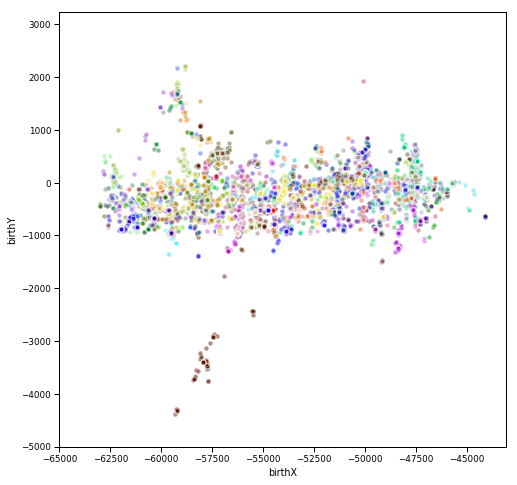

In [20]:
fig, ax = plt.subplots(figsize=(8,8))
plt.xlim(*x_bounds)
plt.ylim(*y_bounds)


graph, = plt.plot([], [], 'o', alpha = 0.25)


def animate(t):
    include = migration_sub.query('(t_start <= @t) and (t_end > @t)')

    for i in migration_sub['last'].unique():
        graph = sns.scatterplot(data = include.query('last == @i'), \
                                x = 'birthX', y = 'birthY', color = colors[i], alpha = 0.5)
    return graph

ani = animation.FuncAnimation(fig, animate, frames=t_frames, interval=interval)

# Save animation to video
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
# out_file = 'plots/animated_population_release-%i.mpeg' % r
# ani.save(out_file)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('ani.mp4', writer=writer)
# ani.save('MovWave.mpeg', writer="ffmpeg")
